In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
feverData  = pd.read_csv('Fever.csv')
feverData.head() 

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [3]:
feverData.shape

(36, 4)

In [4]:
feverData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
feverData.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [6]:
feverData.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

## Problem 1:

#### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

For valiable 'A' \
$H_0$ : All the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable A is equal. \
$H_1$ : At least one of the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable A is unequal.

* $H_0$: $\mu$1 = $\mu$2 = $\mu$3
* $H_A$: means are not edual


For variable 'B' \
$H_0$ : All the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable B is equal. \
$H_1$ : At least one of the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable B is unequal.

* $H_0$: $\mu$1 = $\mu$2 = $\mu$3
* $H_A$: means are not edual

#### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
formula = 'Relief  ~ C(A)'
model = ols(formula, feverData).fit()
aov_table = anova_lm(model)
print(aov_table)
print('\nBased on one way ANOVA result above PR(>F) = 4.578242e-07. this indicate \'p\' value is less than the significance level.'+
      '\nWe can reject the null hypothesis and states that \'at least one of the three means\' ( 𝜇 1, 𝜇 2, 𝜇 3) of \nthree levels (1,2,3) with respect to ingredient variable A is unequal.')

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

Based on one way ANOVA result above PR(>F) = 4.578242e-07. this indicate 'p' value is less than the significance level.
We can reject the null hypothesis and states that 'at least one of the three means' ( 𝜇 1, 𝜇 2, 𝜇 3) of 
three levels (1,2,3) with respect to ingredient variable A is unequal.


#### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
formula = 'Relief  ~ C(B)'
model = ols(formula, feverData).fit()
aov_table = anova_lm(model)
print(aov_table)
print('\nBased on one way ANOVA result above PR(>F) = 0.00135. this indicate \'p\' value is less than the significance level.'+
      '\nWe can reject the null hypothesis and states that \'at least one of the three means\' ( 𝜇 1, 𝜇 2, 𝜇 3) of \nthree levels (1,2,3) with respect to ingredient variable B is unequal.')

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

Based on one way ANOVA result above PR(>F) = 0.00135. this indicate 'p' value is less than the significance level.
We can reject the null hypothesis and states that 'at least one of the three means' ( 𝜇 1, 𝜇 2, 𝜇 3) of 
three levels (1,2,3) with respect to ingredient variable B is unequal.


#### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

<AxesSubplot:xlabel='A', ylabel='Relief'>

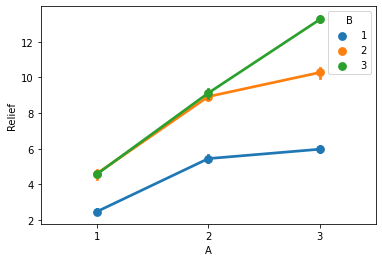

In [3]:
sns.pointplot(x='A', y='Relief',hue='B',data=feverData)

<AxesSubplot:xlabel='B', ylabel='Relief'>

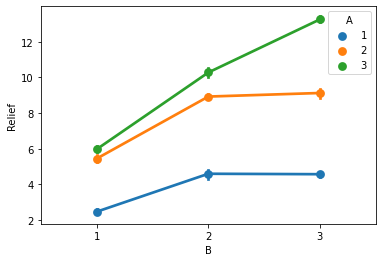

In [4]:
sns.pointplot(x='B', y='Relief',hue='A', data=feverData)

#### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

In [11]:
model=ols('Relief ~ C(A) + C(B) + C(A):C(B)',data=feverData).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)
print("\nAs two different ingredients A and B interaction is 6.972083e-17 which is less than 0.05.")
print("There seems to be statistical interaction")

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

As two different ingredients A and B interaction is 6.972083e-17 which is less than 0.05.
There seems to be statistical interaction


#### 1.6) Mention the business implications of performing ANOVA for this particular case study.

1. It seems type-3 of either variable A or variable B is most effective providing relief compare to type-1 or type -2 of either variable A or variable B
1. It seems type-2 of either variable A or variable B is less effective providing relief compare to type-3 but more effective than type-1 of either variable A or variable B
1. It seems type-1 of either variable A or variable B is least effective providing relief compare to type-2 or type-3 of either variable A or variable B

## Problem 2

#### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [2]:
edu_data = pd.read_csv('Education+-+Post+12th+Standard.csv')
edu_data.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                         417                        193  
Accept                       349                        146  
Enroll                       137                         55  
Top10perc                     60                         16  
Top25perc                     89                         44  
F.Undergrad                  510                        249  
P.Undergrad                   63                        869  
Outstate                   12960                       7560  
Room.Board                  5450                       4120  
Books                        450                        800  
Personal                     875                       1500  
PhD                           92                         76  
Terminal                      97                         72  
S.F.Ratio                    7.7                       11.9  
perc.alumni                   37                          2  
Expend                     19016                      10922  
Grad.Rate                     59                         15

### Univariate analysis

In [22]:
edu_data.shape # see the shape of the data

(777, 18)

In [23]:
edu_data.duplicated().sum() ##Identify duplicates records in the data

0

In [27]:
edu_data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
edu_data.info() # To see the data type of each of the variable, number of values entered in each of the variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [28]:
edu_data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [8]:
print(edu_data.var()) # the output brief's regarding how much was the data dispersion .

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
dtype: float64


In [9]:
print(edu_data.std()) # the output brief's regarding how much was the data deviated away from the mean .

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64


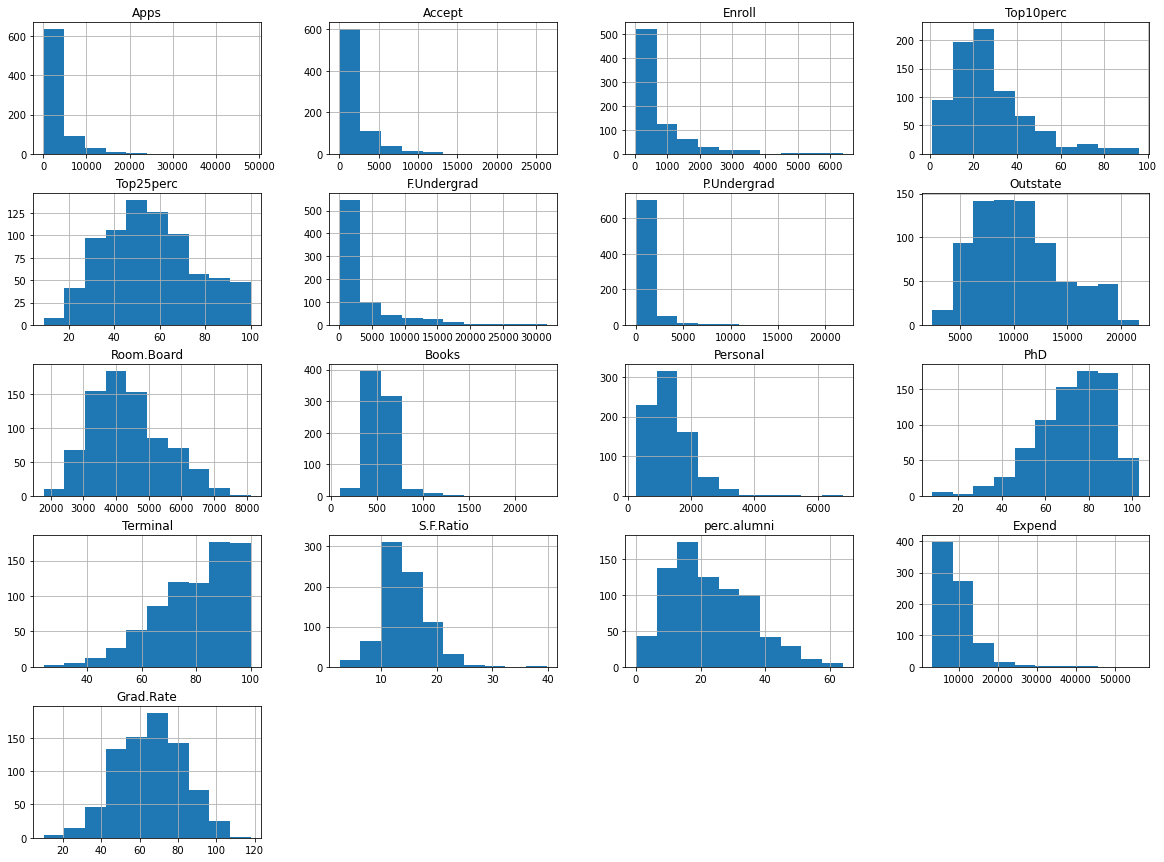

In [10]:
edu_data.hist(figsize=(20,15));

### Bivariate analysis

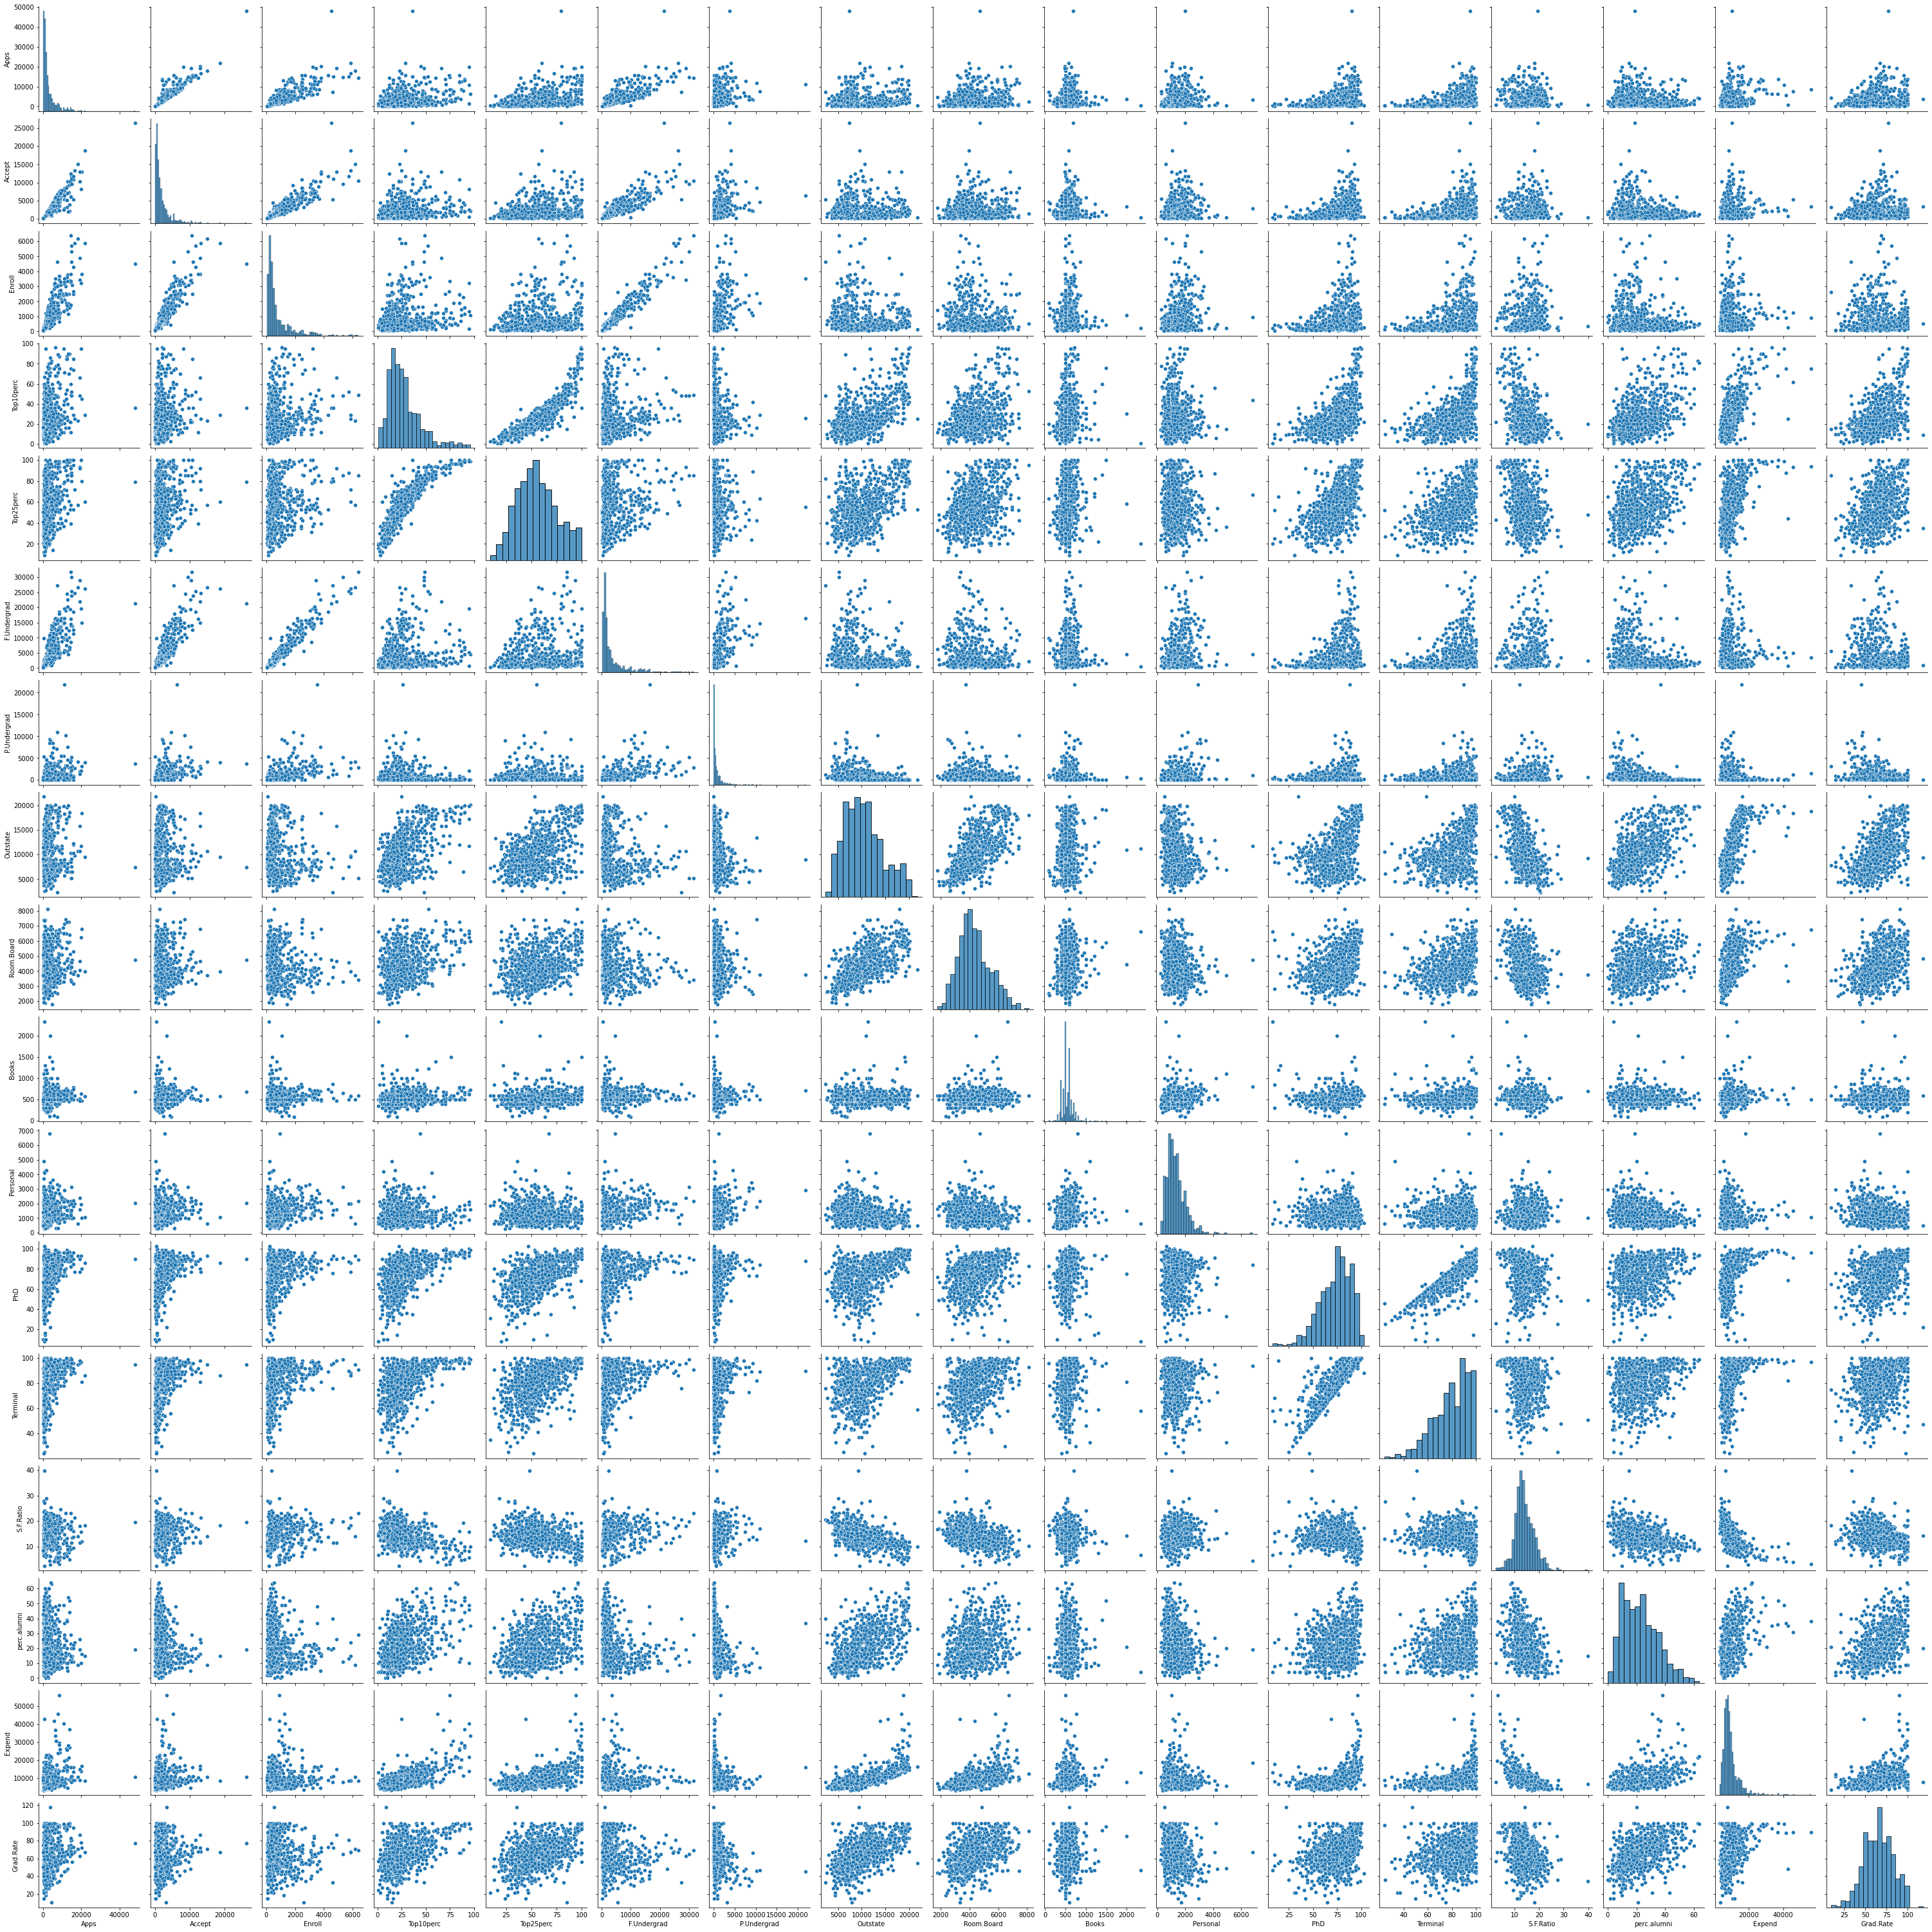

In [24]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = edu_data)
plt.show()

In [26]:
edu_data.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [27]:
edu_data.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

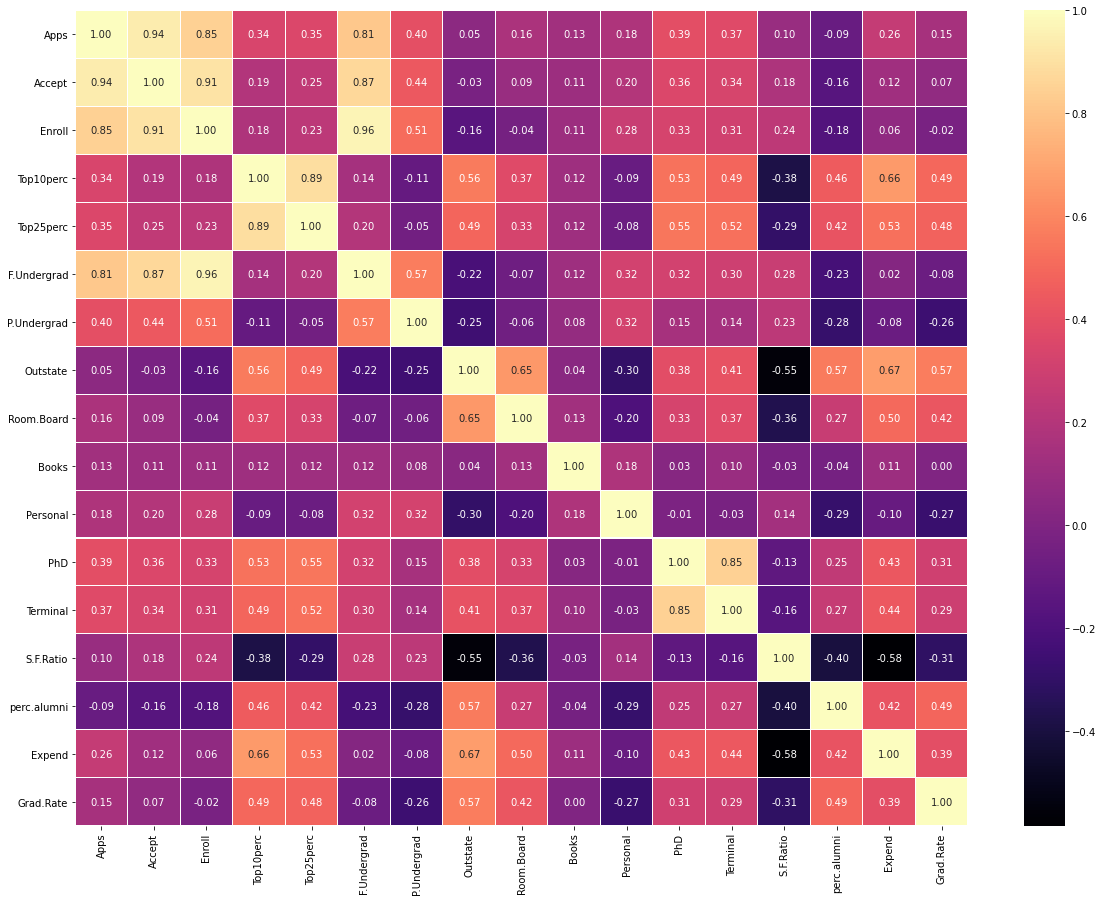

In [28]:
fig,ax = plt.subplots(figsize=(20, 15))   
sns.heatmap(edu_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

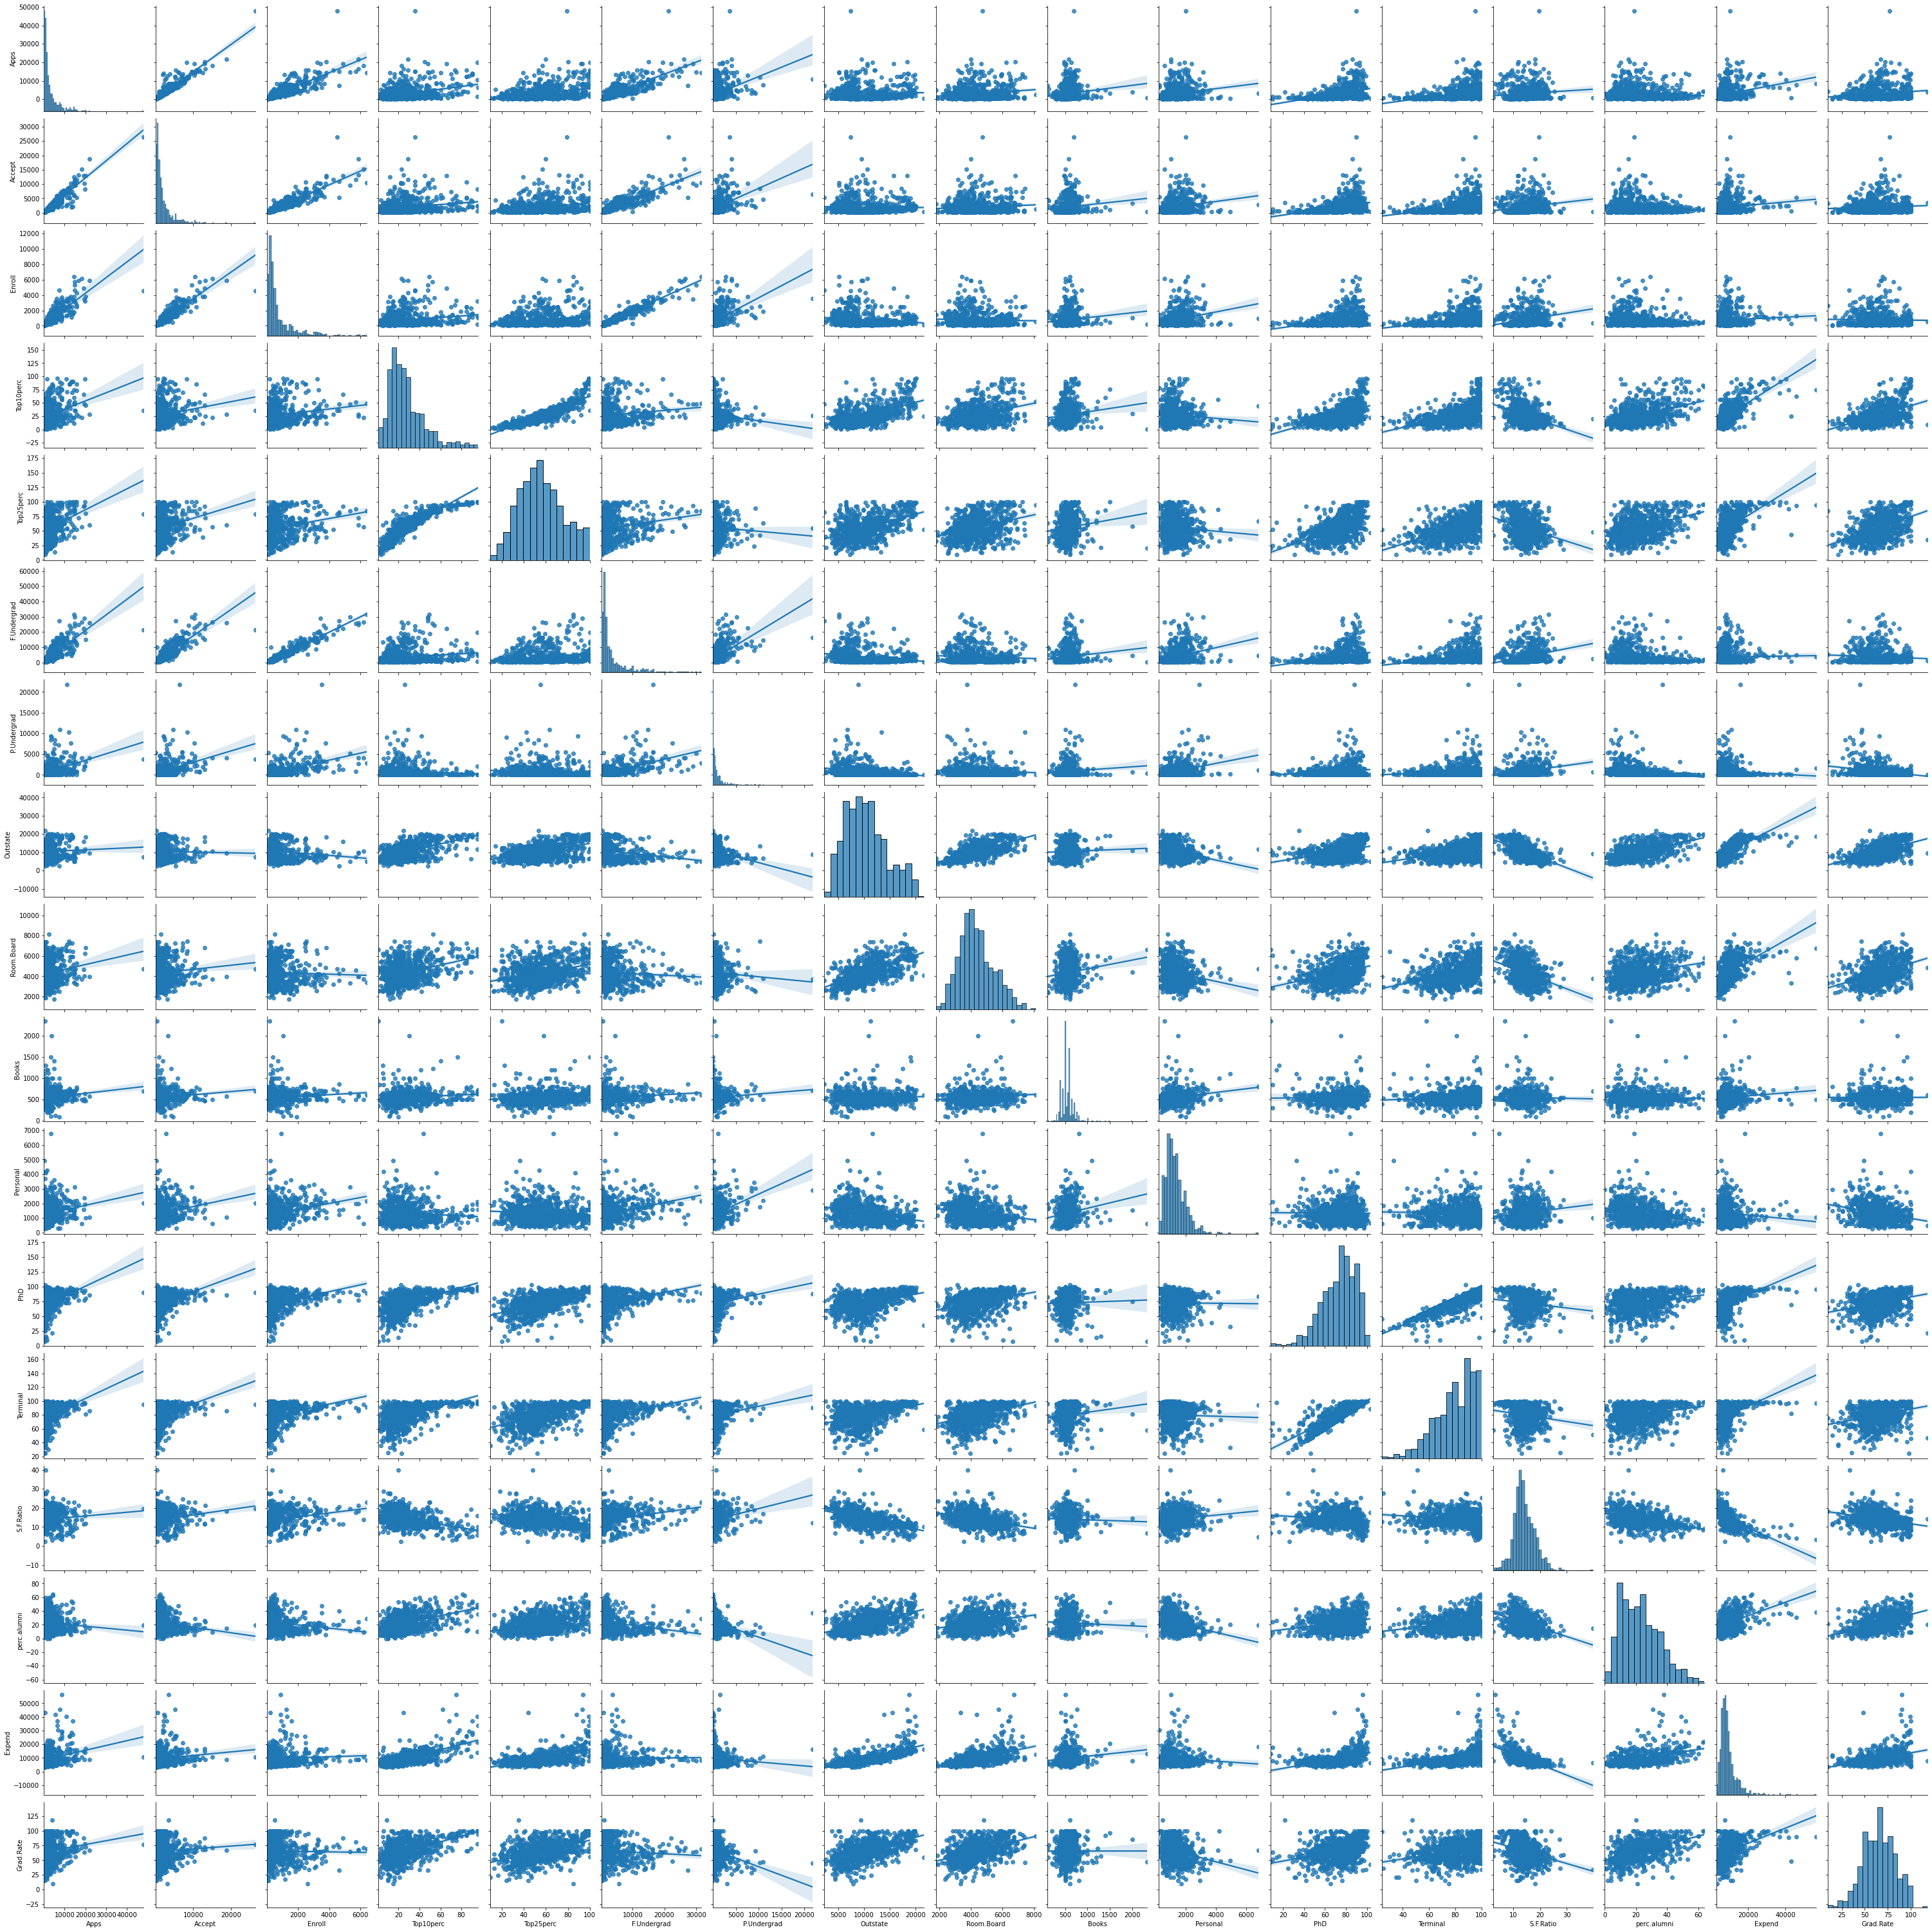

In [5]:
import seaborn as sns

sns.pairplot(edu_data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

<AxesSubplot:>

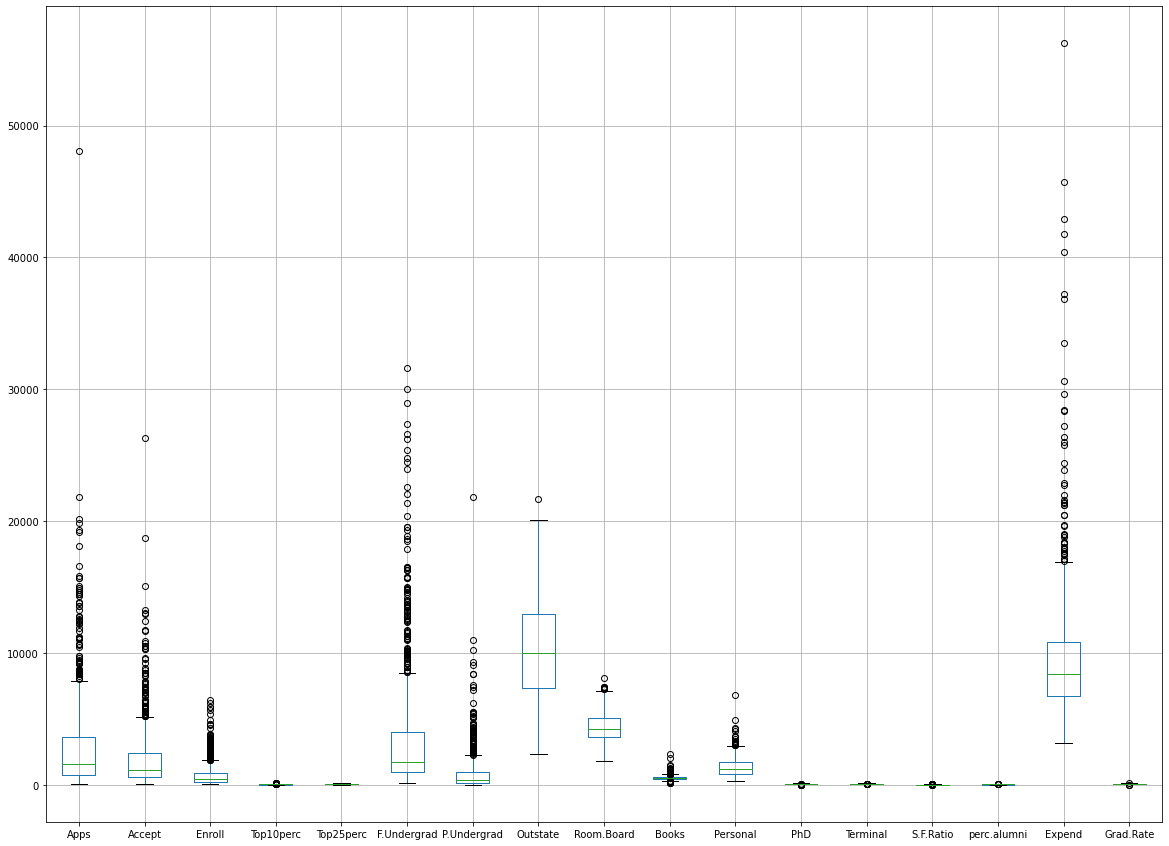

In [30]:
edu_data.boxplot(figsize=(20,15))

#### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

In [3]:
edu_data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [4]:
edu_data=edu_data.drop(['Names'], axis=1)

In [5]:
from scipy.stats import zscore
edu_data_scaled=edu_data.apply(zscore)
edu_data_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

<AxesSubplot:>

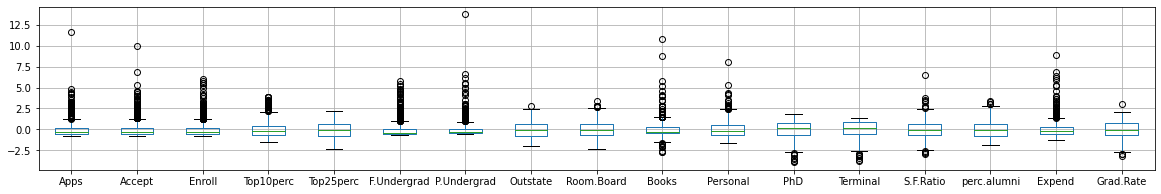

In [8]:
edu_data_scaled.boxplot(figsize=(20,3))

#### 2.3) Comment on the comparison between covariance and the correlation matrix after scaling

In [9]:
edu_data.cov().T

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [10]:
edu_data.corr().T

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [11]:
edu_data_scaled.cov().T

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [12]:
edu_data_scaled.corr().T

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

#### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

For Q2.4, import the data again from the source, make boxplot, scale the data, again make the boxplot on the scaled data then see the difference and write the inference.

<AxesSubplot:>

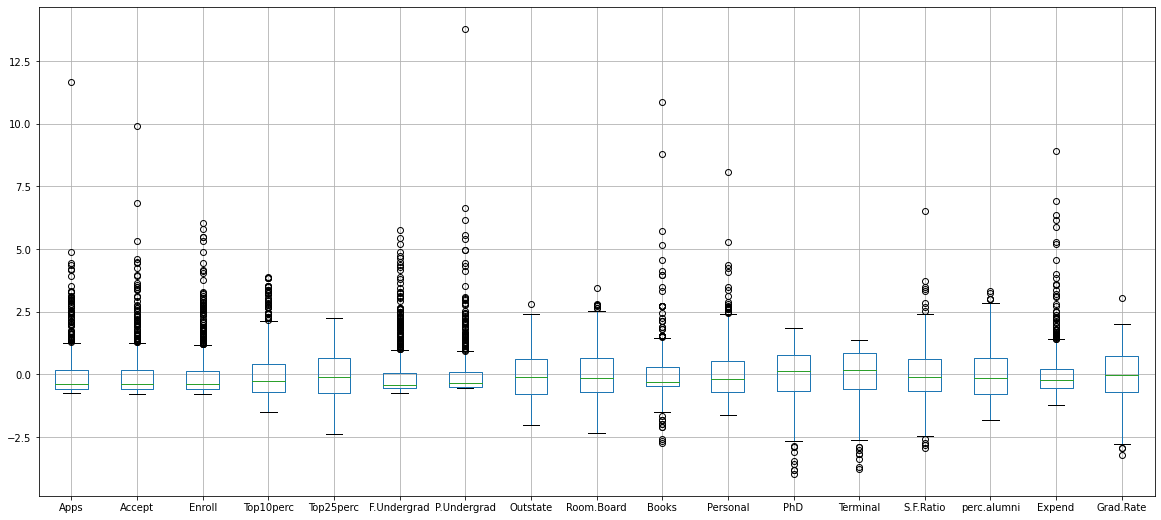

In [17]:
edu_data_scaled.boxplot(figsize=(20,9))

<AxesSubplot:>

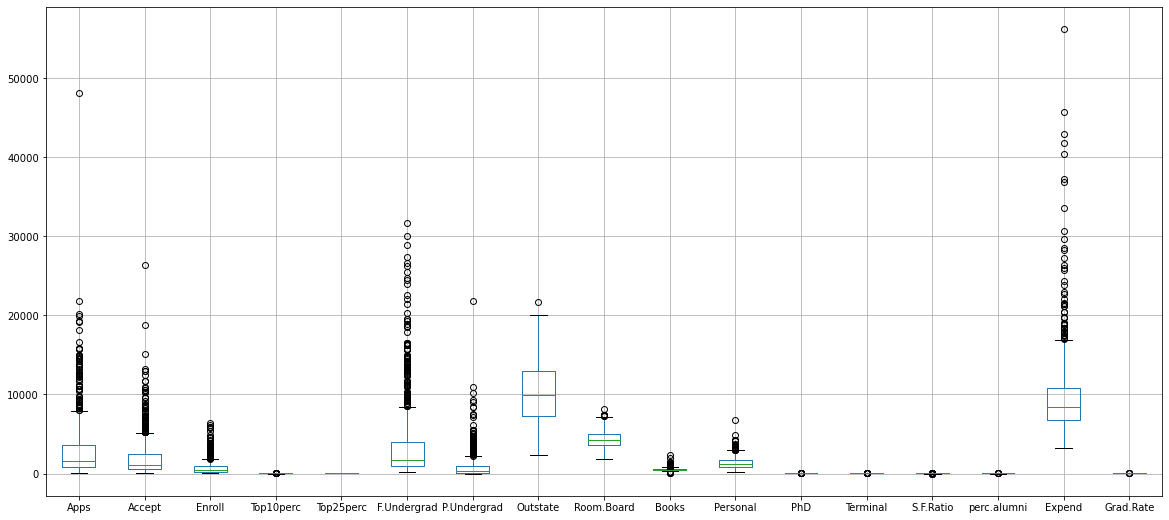

In [18]:
edu_data.boxplot(figsize=(20,9))

#### 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.

In [19]:
cov_matrix = np.cov(edu_data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [20]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

#### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [24]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
data_reduced = pca.fit_transform(edu_data)
data_reduced.transpose()
data_reduced[0].T

array([-2.55183786e+03, -3.44594720e+03,  1.25066203e+03,  2.34146253e+02,
       -3.46951300e+02,  4.68891437e+02,  7.17555789e+02, -1.75409142e+02,
       -1.19839807e+02, -1.14561654e+02, -8.20729877e+00, -3.14068321e+00,
       -3.96452025e-01, -7.70936415e+00,  2.59720689e+00, -3.62233243e-01,
        2.74805786e+00])

In [23]:
edu_data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

-2.55183786e+03 * Apps +  -3.44594720e+03 * Accept +   1.25066203e+03 * Enroll +   2.34146253e+02 * Top10perc + 
       -3.46951300e+02 * Top25perc +   4.68891437e+02 * F.Undergrad +   7.17555789e+02 * P.Undergrad +  -1.75409142e+02 * Outstate + 
       -1.19839807e+02 * Room.Board +  -1.14561654e+02 * Books +  -8.20729877e+00 * Personal +  -3.14068321e+00 * PhD + 
       -3.96452025e-01 * Terminal +  -7.70936415e+00 * S.F.Ratio +   2.59720689e+00 * perc.alumni +  -3.62233243e-01 * Expend +   2.74805786e+00 * Grad.Rate
       

#### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [140]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 42.99732852  63.45220446  71.6721678   78.32291889  83.83041672
  87.54499916  90.19304051  92.51334235  94.25623065  95.69005771
  96.89092073  97.88286376  98.65957897  99.29648538  99.77058652
  99.94079976 100.        ]


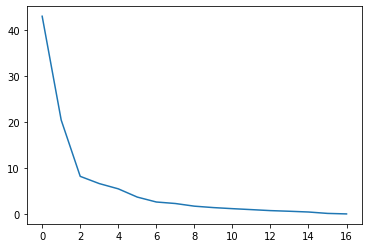

In [139]:
plt.plot(var_exp)

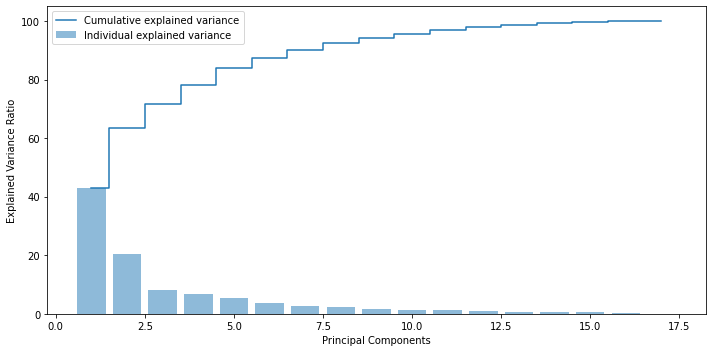

In [141]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### 2.8) Mention the business implication of using the Principal Component Analysis for this case study.